In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tp=sns.load_dataset('tips')
tp.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tp.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [6]:
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
day_encoder = LabelEncoder()
time_encoder = LabelEncoder()

In [8]:
#check the no of male and female 
tp['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [10]:
#check the no of smoker
tp['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [12]:
#check the no of day
tp['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
#check the time
tp['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [14]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [15]:
X = tp[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
Y = tp['tip']

In [16]:
import warnings
warnings.filterwarnings('ignore')

sex_encoder.fit(pd.DataFrame(X['sex']))
X['sex']=sex_encoder.transform(X['sex'])

smoker_encoder.fit(pd.DataFrame(X['smoker']))
X['smoker']=smoker_encoder.transform(X['smoker'])

day_encoder.fit(pd.DataFrame(X['day']))
X['day']=day_encoder.transform(X['day'])

time_encoder.fit(pd.DataFrame(X['time']))
X['time']=time_encoder.transform(X['time'])

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [21]:
X['sex'].value_counts()

sex
1    157
0     87
Name: count, dtype: int64

In [22]:
X['smoker'].value_counts()

smoker
0    151
1     93
Name: count, dtype: int64

In [23]:
X['day'].value_counts()

day
1    87
2    76
3    62
0    19
Name: count, dtype: int64

In [24]:
cormat = X.corr()
cormat

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


<Axes: >

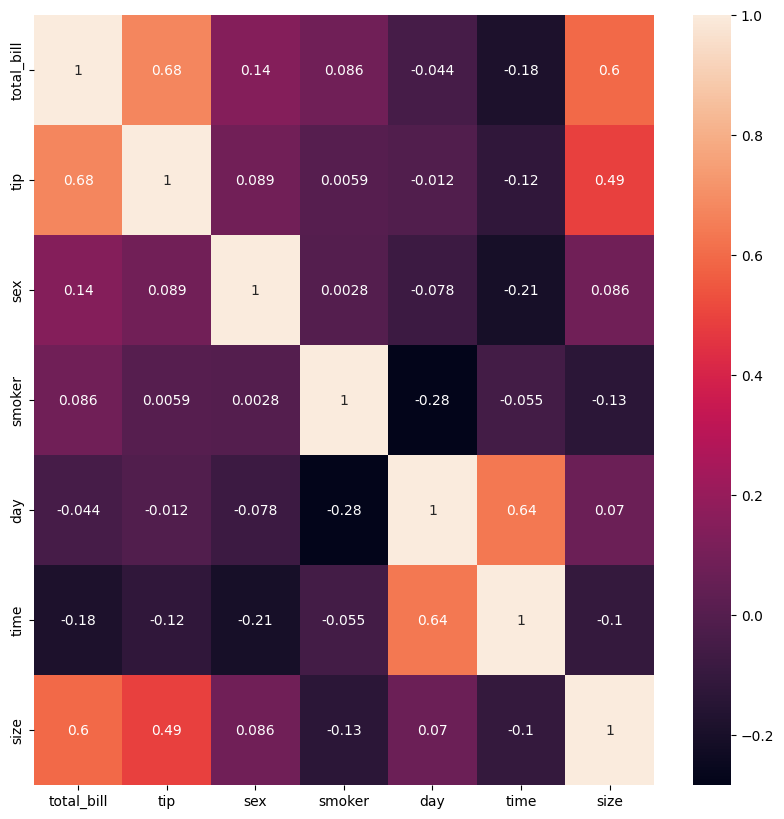

In [26]:
plt.figure (figsize = (10,10))
sns.heatmap(X.corr(),annot=True)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((195, 7), (49, 7), (195,), (49,))

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=model.predict(X_test)
print(y_pred)

[3.18 2.   2.   5.16 2.   2.   2.56 2.52 3.23 3.   3.   1.47 1.5  2.
 1.83 1.36 4.   3.92 2.47 5.   2.45 3.35 4.   1.45 3.5  2.31 1.71 5.
 2.   5.   4.   1.44 2.34 3.21 3.5  2.92 1.5  5.   2.75 2.   1.25 2.
 2.55 1.67 2.   1.   1.61 2.31 1.44]


In [38]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error

In [39]:
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("the r2 score is", score)
print("the mean absolute error is", mae)
print("the mean squared error is", mse)
print("the root mean squared error is", rmse)

the r2 score is 1.0
the mean absolute error is 6.654994016181653e-14
the mean squared error is 7.413439088430295e-27
the root mean squared error is 8.610133035226746e-14


In [40]:
import joblib
joblib.dump(model,'tips_model')

['tips_model']